# Bank Chrun Analysis Model Using Scikit-Learn

## Importing Required Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as ses
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import StandardScaler,normalize
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,log_loss,balanced_accuracy_score
from sklearn.model_selection import validation_curve,learning_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image,Markdown,display
import pydot
import random
from subprocess import call
import scikitplot as skplt
import sys
import cgi
from time import sleep
%matplotlib inline

g:\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
g:\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
g:\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Preprocessing

## Getting information from CSV file

In [3]:
data_frame = pd.read_csv('Churn_Modelling.csv')
data_frame

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Resampling 

In [4]:
df_majority = data_frame[data_frame.Exited==0]
df_minority = data_frame[data_frame.Exited==1]
new_data=df_majority.sample(n=3000)
churn_data_set = pd.concat([df_minority,new_data],axis='rows')
data_frame=churn_data_set

In [5]:
data_frame

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3882,15794276,Steele,588,France,Female,64,3,0.00,1,1,1,189703.65,0
5964,5965,15802220,Ikenna,599,Spain,Male,35,6,137102.65,1,0,0,76870.81,0
8789,8790,15619116,Wallace,493,France,Female,36,2,0.00,2,0,1,99770.30,0
2779,2780,15781702,Brookes,733,Germany,Male,38,9,111347.37,2,0,1,194872.97,0


# Seprating the Numerical_features and Catagorical_features

In [6]:
numerical_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
catagorical_features = ['Geography','Gender','HasCrCard','IsActiveMember']
numerical_features_data_set = data_frame[numerical_features]
catagorical_features_data_set=data_frame[catagorical_features]

## From the dataset the ratio of Chruned and Not-Chruned is

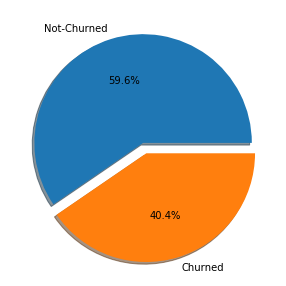

0    3000
1    2037
Name: Exited, dtype: int64

In [7]:
figure_1,ax_1 = plt.subplots(1,1,figsize=(5,5))
ax_1.pie(data_frame['Exited'].value_counts(),labels=['Not-Churned','Churned'],autopct='%1.1f%%', shadow=True,explode=(0,0.1))
plt.show()
data_frame['Exited'].value_counts()

### Now as you can see that the dataset consist of highly varying numerical attributes 

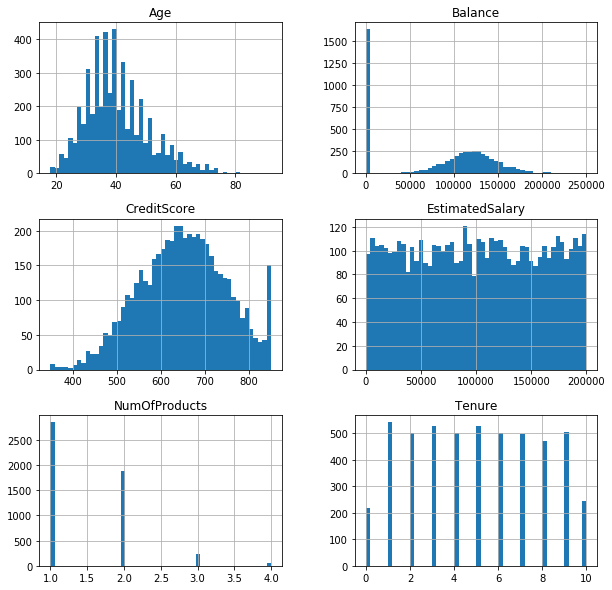

In [9]:
kwargs = dict(alpha=1, bins=50,figsize=(10,10))
data_frame[numerical_features].hist(**kwargs)
plt.show()

### Since the data features might not be enoughed for our classifier lets add more columns to it 
Make to more coloumns, we have taken CreditScore/No.of Products and Balance/CreditScore

In [10]:
numerical_features_data_set['CRS_to_PROD'] = numerical_features_data_set['CreditScore']/numerical_features_data_set['NumOfProducts']
numerical_features_data_set['BAL_to_CRS'] = numerical_features_data_set['Balance']/numerical_features_data_set['CreditScore']
numerical_features_data_set

g:\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
g:\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,CRS_to_PROD,BAL_to_CRS
0,619,42,2,0.00,1,101348.88,619.000000,0.000000
2,502,42,8,159660.80,3,113931.57,167.333333,318.049402
5,645,44,8,113755.78,2,149756.71,322.500000,176.365550
7,376,29,4,115046.74,4,119346.88,94.000000,305.975372
16,653,58,1,132602.88,1,5097.67,653.000000,203.067198
...,...,...,...,...,...,...,...,...
3881,588,64,3,0.00,1,189703.65,588.000000,0.000000
5964,599,35,6,137102.65,1,76870.81,599.000000,228.885893
8789,493,36,2,0.00,2,99770.30,246.500000,0.000000
2779,733,38,9,111347.37,2,194872.97,366.500000,151.906371


# Now let's see the effect of numerical_features on Chrun

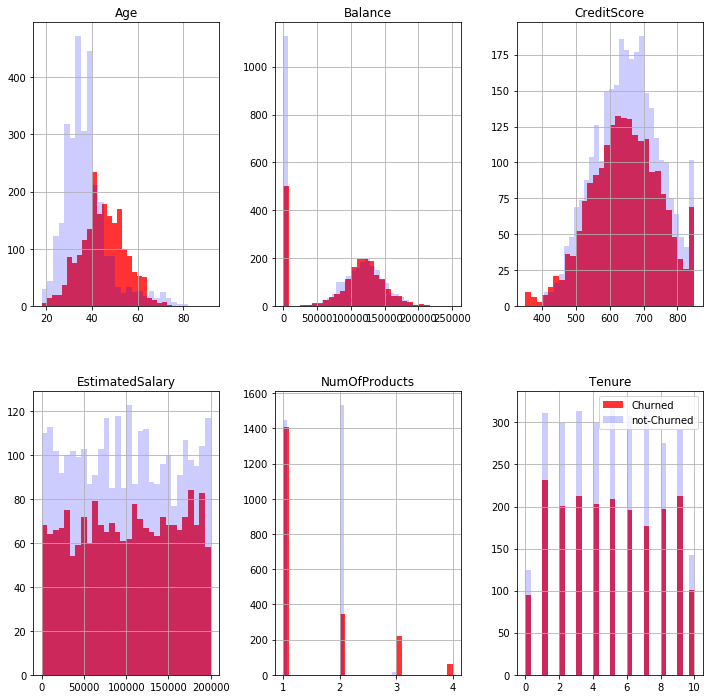

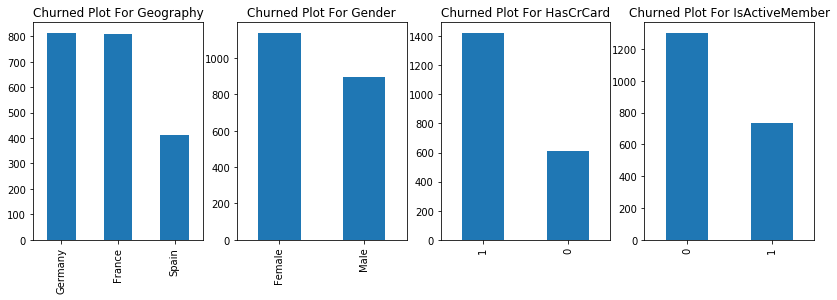

In [11]:
fig_new,ax_new =plt.subplots(2,3,figsize=(12,12))
data_frame[data_frame.Exited==1][numerical_features].hist(color='red',alpha=0.8,ax=ax_new,bins=30,label="Churned")
data_frame[data_frame.Exited==0][numerical_features].hist(color='blue',alpha=0.2,ax=ax_new,bins=30,label="not-Churned")
plt.legend()
plt.show()

feature = ['Geography','Gender','HasCrCard','IsActiveMember']
fig, ax = plt.subplots(1, 4, figsize=(14, 4))
for i in range(4):
    
    data_frame[data_frame.Exited == 1][feature[i]].value_counts().plot(kind="bar", ax=ax[i]).set_title("Churned Plot For "+str(feature[i]))

Data contains string elements so we need to encode it to numerical ones before that lets seprate the target value from the dataset

In [12]:
y = data_frame['Exited']
data_frame = data_frame.drop(['RowNumber','CustomerId','Surname'],axis='columns')

In [13]:
Gender_dummy = pd.get_dummies(catagorical_features_data_set.Gender)
Geography_dummy = pd.get_dummies(catagorical_features_data_set.Geography)

In [14]:
final_data = pd.concat([numerical_features_data_set,Gender_dummy,Geography_dummy,catagorical_features_data_set.IsActiveMember,catagorical_features_data_set.HasCrCard],axis='columns') 
final_data=final_data.drop(['Male','Spain'],axis='columns')

# Now let's split the data into training and testing

In [15]:
y= data_frame['Exited']
X = final_data
X_train1,X_test1,y_train1,y_test1= train_test_split(X,y,test_size = 0.2,random_state=13)
X_train = X_train1.to_numpy()
X_test = X_test1.to_numpy()
y_train = y_train1.to_numpy()
y_test = y_test1.to_numpy()


In [16]:
y_test1.value_counts()

0    609
1    399
Name: Exited, dtype: int64

In [17]:
X_test1

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,CRS_to_PROD,BAL_to_CRS,Female,France,Germany,IsActiveMember,HasCrCard
7868,611,29,4,78885.88,2,26927.69,305.500000,129.109460,1,0,1,1,1
7567,629,44,5,0.00,4,117572.59,157.250000,0.000000,0,1,0,0,0
7870,529,29,8,0.00,2,19842.11,264.500000,0.000000,1,1,0,0,1
3935,728,45,3,108924.33,2,84300.40,364.000000,149.621332,0,0,1,0,1
743,611,49,2,88915.37,3,161435.02,203.666667,145.524337,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,834,57,8,112281.60,3,140225.14,278.000000,134.630216,1,0,1,0,1
3416,532,38,9,0.00,2,30583.95,266.000000,0.000000,0,1,0,0,0
4104,850,55,6,0.00,1,944.41,850.000000,0.000000,0,1,0,0,1
4421,630,31,1,0.00,2,169802.73,315.000000,0.000000,1,0,0,1,1


In [18]:
d = np.where(y_test==0, 'Not_Churned', y_test)
labels=np.where(y_test==1,'Churned',d)
labels

array(['Not_Churned', 'Churned', 'Not_Churned', ..., 'Churned',
       'Not_Churned', 'Not_Churned'], dtype='<U21')

# Now it's time to train our model usign classifier
we will use DecisionTreeClassifier to train it

In [19]:
try:
    def training_curve(model):
        train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(max_leaf_nodes=model.max_leaf_nodes,max_features=model.max_features), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
        # Create means and standard deviations of training set scores
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)

        # Create means and standard deviations of test set scores
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Draw lines
        plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
        plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

        # Draw bands
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

        # Create plot
        plt.title("Learning Curve")
        plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
        plt.tight_layout()
        plt.show()
        

    
 
    def churned_pie(dec_clf_predict):
        dec_tree_clf_predict_pis = pd.Series(dec_clf_predict)
        figure_1,ax_1 = plt.subplots(1,1,figsize=(5,5))
        display(Markdown(f"<h3>Test Data</h3>"))
        ax_1.pie(pd.Series(y_test).value_counts(),labels=['Not-Churned','Churned'],autopct='%1.1f%%', shadow=True,explode=(0,0.1))
        plt.show()
        figure_1,ax_1 = plt.subplots(1,1,figsize=(5,5))
        display(Markdown(f"<h3>Predicted Data</h3>"))
        ax_1.pie(dec_tree_clf_predict_pis.value_counts(),labels=['Not-Churned','Churned'],autopct='%1.1f%%', shadow=True,explode=(0,0.1))
        plt.show()        
    def progress(count, total, status=''):
        bar_len = 60
        filled_len = int(round(bar_len * count / float(total)))

        percents = round(100.0 * count / float(total), 1)
        bar = '=' * filled_len + '-' * (bar_len - filled_len)

        sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
        sys.stdout.flush()
    def classifier_fun():
        
        display(Markdown("""<div class="alert alert-block alert-info">
<b>Training the model:</b>Using Customized RandomForestClassifier with randomizer parameters to achive around 80% accuracy.
</div>"""))
        sleep(2)
        count_itter = 1
        while True:
            model = RandomForestClassifier(max_depth=random.randint(2,7),max_features=random.randint(5,13),max_leaf_nodes=None,n_estimators=200)
            model.fit(X_train,y_train)
            model_predict = model.predict(X_test)
            cm = confusion_matrix(y_test,model_predict)
        
            
            if  model.score(X_train,y_train)>model.score(X_test,y_test) and model.score(X_train,y_train)>0.81 and model.score(X_train,y_train) - model.score(X_test,y_test) < 0.04:
                display(Markdown(f"<h1>Accuracy Report</h1>"))
                print("Average Accuracy "+str(accuracy_score(y_test,model_predict.reshape(-1,1))*100))
                print("Training Accuracy "+str(model.score(X_train,y_train)*100))  
                print("Test Accuracy "+str(model.score(X_test,y_test)*100))
                print("Log_Los "+str(log_loss(y_test,model_predict.reshape(-1,1)*100)))
                display(Markdown(f"<h1>Learned Parameters</h1>"))
                print("Max_depth "+str(model.max_depth))
                print("Max_leaf_nodes "+str(model.max_leaf_nodes))
                print("Max_Features "+str(model.max_features))
                display(Markdown(f"<h1>Classification report</h1>"))
                print(classification_report(y_test,model_predict.reshape(-1,1)))
                display(Markdown(f"<h1>Validation Curve</h1>"))
                param_range = np.arange(1, model.max_depth, 1)
                train_scores, test_scores = validation_curve(RandomForestClassifier(max_leaf_nodes=model.max_leaf_nodes,max_features=model.max_features),X,y,param_name='max_depth',param_range=param_range,cv=3,scoring="accuracy",n_jobs=-1)
# Calculate mean and standard deviation for training set scores
                train_mean = np.mean(train_scores, axis=1)
                train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
                test_mean = np.mean(test_scores, axis=1)
                test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
                plt.plot(param_range, train_mean, label="Training score", color="red")
                plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Create plot
                plt.title("Validation Curve With RandomForestClassifier")
                plt.xlabel("Maximum-Depth")
                plt.ylabel("Accuracy Score")
                plt.tight_layout()
                plt.legend(loc="best")
                plt.show()
                display(Markdown(f"<h1>Confusion Matrix-Normalized</h1>"))
                print("Confusion Matrix \n"+str(cm))
                skplt.metrics.plot_confusion_matrix(y_test,model_predict.reshape(-1,1),normalize=True)
                plt.show()
                
                d = np.where(y_test==0, 'Not_Churned', y_test)
                labels=np.where(y_test==1,'Churned',d)
                class_names=labels.tolist()
                feature_names=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','CRS_to_PROD','BAL_to_CRS','Female','France','Germany','IsActiveMember','HasCrCard']
                estimator = model.estimators_[100]
                
                export_graphviz(estimator, out_file='tree.dot', 
                    feature_names = feature_names,
                    class_names = class_names,
                    rounded = True, proportion = True, 
                    precision = 2, filled = True)
                call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
                display(Markdown(f"<h1>Churned Pie After Training</h1>"))
                churned_pie(model_predict)
                training_curve(model)
               
                
                
                break
            else:
                total = 100
                i = 0
                while i < total:
                    
                    progress(i, total, status='Learning Model,with Different parameters')
                    sleep(0.01)
                    i += 1   
                print("\n")
                print("Itters = "+str(count_itter))
                print("Balanced Accuracy Test "+str(balanced_accuracy_score(y_test,model_predict.reshape(-1,1))*100))
                print("Training Accuracy "+str(model.score(X_train,y_train)*100))  
                print("Test Accuracy "+str(model.score(X_test,y_test)*100))
                print("Log_Los "+str(log_loss(y_test,model_predict.reshape(-1,1)*100)))
                
                count_itter+=1    
except Exception:
    print("Unexpected error: Re-try")

<div class="alert alert-block alert-info">
<b>Training the model:</b>Using Customized RandomForestClassifier with randomizer parameters to achive around 80% accuracy.
</div>

[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 1
Balanced Accuracy Test 75.5811943652234
Training Accuracy 80.41697691734922
Test Accuracy 78.27380952380952
Log_Los 7.5040158753031285
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 2
Balanced Accuracy Test 74.20706939763203
Training Accuracy 77.91015140233309
Test Accuracy 77.08333333333334
Log_Los 7.9151941645206065
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 3
Balanced Accuracy Test 74.74289171203871
Training Accuracy 80.5162571357657
Test Accuracy 77.67857142857143
Log_Los 7.7096022435319025
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 4
Balanced Accuracy Test 74.43176907786709
Training Accuracy 76.02382725241995
Test Accuracy 76.

<h1>Accuracy Report</h1>

Average Accuracy 78.86904761904762
Training Accuracy 82.42740134028294
Test Accuracy 78.86904761904762
Log_Los 7.298426334068679


<h1>Learned Parameters</h1>

Max_depth 7
Max_leaf_nodes None
Max_Features 9


<h1>Classification report</h1>

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       609
           1       0.79      0.64      0.70       399

    accuracy                           0.79      1008
   macro avg       0.79      0.76      0.77      1008
weighted avg       0.79      0.79      0.78      1008



<h1>Validation Curve</h1>

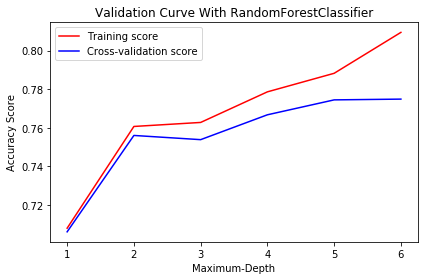

<h1>Confusion Matrix-Normalized</h1>

Confusion Matrix 
[[541  68]
 [145 254]]


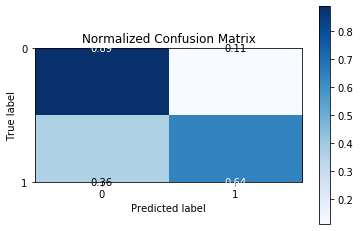

<h1>Churned Pie After Training</h1>

<h3>Test Data</h3>

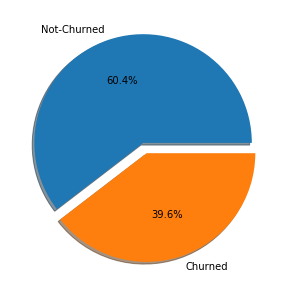

<h3>Predicted Data</h3>

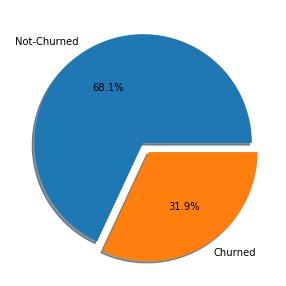

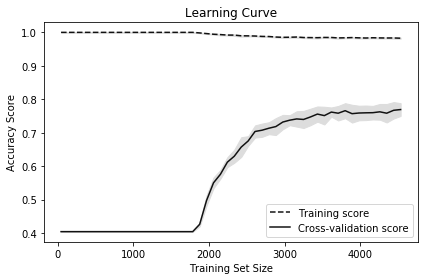

In [18]:
classifier_fun()

# MLP CLASSIFIER

In [144]:
X_test_normal = X_test.copy()
X_train_normal= X_train.copy()
y_test_normal = y_test.copy()
y_train_normal= y_train.copy()

<h1>Accuracy Report</h1>

Average Accuracy 60.11904761904761
Training Accuracy 59.369570613055345
Test Accuracy 60.11904761904761
Log_Los 13.774396140023628


<h1>Classification report</h1>

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       609
           1       0.20      0.00      0.00       399

    accuracy                           0.60      1008
   macro avg       0.40      0.50      0.38      1008
weighted avg       0.44      0.60      0.46      1008



<h3>Test Data</h3>

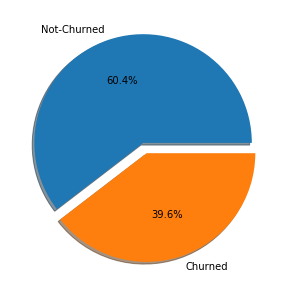

<h3>Predicted Data</h3>

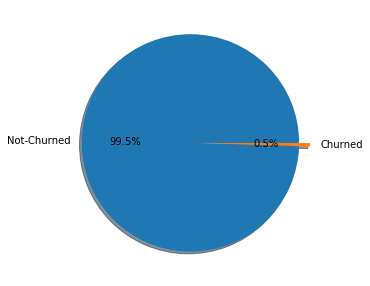

<h1>Confusion Matrix-Normalized</h1>

Confusion Matrix 
[[605   4]
 [398   1]]


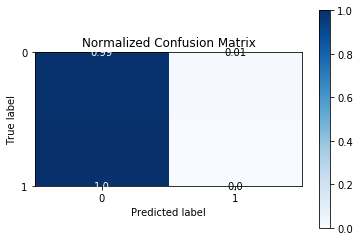

In [146]:
neural_network=MLPClassifier(activation='logistic',solver='adam',hidden_layer_sizes=200,max_iter=400)
neural_network.fit(X_train_normal,y_train_normal)
nn_predict=neural_network.predict(X_test_normal)
display(Markdown(f"<h1>Accuracy Report</h1>"))
print("Average Accuracy "+str(accuracy_score(y_test_normal,nn_predict.reshape(-1,1))*100))
print("Training Accuracy "+str(neural_network.score(X_train_normal,y_train_normal)*100))  
print("Test Accuracy "+str(neural_network.score(X_test_normal,y_test_normal)*100))
print("Log_Los "+str(log_loss(y_test_normal,nn_predict.reshape(-1,1)*100)))
cm = confusion_matrix(y_test_normal,nn_predict)
display(Markdown(f"<h1>Classification report</h1>"))
print(classification_report(y_test_normal,nn_predict.reshape(-1,1)))

dec_tree_clf_predict_pis = pd.Series(nn_predict)
figure_1,ax_1 = plt.subplots(1,1,figsize=(5,5))
display(Markdown(f"<h3>Test Data</h3>"))
ax_1.pie(pd.Series(y_test_normal).value_counts(),labels=['Not-Churned','Churned'],autopct='%1.1f%%', shadow=True,explode=(0,0.1))
plt.show()
figure_1,ax_1 = plt.subplots(1,1,figsize=(5,5))
display(Markdown(f"<h3>Predicted Data</h3>"))
ax_1.pie(dec_tree_clf_predict_pis.value_counts(),labels=['Not-Churned','Churned'],autopct='%1.1f%%', shadow=True,explode=(0,0.1))
plt.show()
display(Markdown(f"<h1>Confusion Matrix-Normalized</h1>"))
print("Confusion Matrix \n"+str(cm))
skplt.metrics.plot_confusion_matrix(y_test_normal,nn_predict.reshape(-1,1),normalize=True)
plt.show()